In [33]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial.head()
mouse_drug.head()

# Combine the data into a single dataset
merge_table = pd.merge(clinical_trial, mouse_drug, on="Mouse ID")

#sort ascending Timepoint
merge_table = merge_table.sort_values(by=['Timepoint'], ascending=True)

# Display the data table for preview
merge_table.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1535,i635,0,45.0,0,Propriva
565,g791,0,45.0,0,Ramicane
1545,w746,0,45.0,0,Propriva
1547,r107,0,45.0,0,Propriva


## Tumor Response to Treatment

In [34]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
Avg_df = merge_table.groupby(["Drug","Timepoint"])
tumor_mean = Avg_df["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_mean = pd.DataFrame(tumor_mean)
tumor_mean = tumor_mean.reset_index()

# Preview DataFrame
tumor_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [35]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SEM_df = merge_table.groupby(['Drug','Timepoint'])
tumor_sem = SEM_df["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_sem = pd.DataFrame(tumor_sem)
tumor_sem = tumor_sem.reset_index()

# Preview DataFrame
tumor_sem.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [36]:
# Minor Data Munging to Re-Format the Data Frames
tumor_df = tumor_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_SEM_df = tumor_sem.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_df.head()
tumor_SEM_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


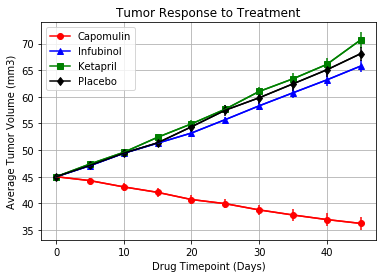

In [37]:
# Generate the Plot (with Error Bars)

plt.errorbar(tumor_df.index,tumor_df['Capomulin'], yerr=tumor_SEM_df['Capomulin'], fmt='', color="red", )
plt.errorbar(tumor_df.index,tumor_df['Infubinol'], yerr=tumor_SEM_df['Infubinol'], fmt='', color="blue", )
plt.errorbar(tumor_df.index,tumor_df['Ketapril'], yerr=tumor_SEM_df['Ketapril'], fmt='', color="green", )
plt.errorbar(tumor_df.index,tumor_df['Placebo'], yerr=tumor_SEM_df['Placebo'], fmt='', color="black", )

# errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, 
#          barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, 
#          errorevery=1, capthick=None, *, data=None, **kwargs)


#Make Line Graph
#Can also make chart with:plt.plot(tumor_df.loc[:,['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']])
plt.xlabel("Drug Timepoint (Days)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(tumor_df['Capomulin'], marker ='o', color="red", label="Capomulin")
plt.plot(tumor_df['Infubinol'], marker ='^', color="blue", label="Infubinol")
plt.plot(tumor_df['Ketapril'], marker ='s', color="green", label="Ketapril")
plt.plot(tumor_df['Placebo'], marker ='d', color="black", label="Placebo")
plt.legend()
plt.title("Tumor Response to Treatment")
plt.grid()
# Save the Figure
plt.savefig("../Images/BryanlineConfig.png")

In [38]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [39]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean = merge_table.groupby(["Drug","Timepoint"])
met_mean = met_mean["Metastatic Sites"].mean()
# Convert to DataFrame
met_mean = pd.DataFrame(met_mean)
met_mean = met_mean.reset_index()
# Preview DataFrame
met_mean.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [40]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = merge_table.groupby(["Drug","Timepoint"])
met_sem = met_sem["Metastatic Sites"].sem()
# Convert to DataFrame
met_sem = pd.DataFrame(met_sem)
met_sem = met_sem.reset_index()
# Preview DataFrame
met_sem.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [41]:
# Minor Data Munging to Re-Format the Data Frames
met_df = met_mean.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
met_SEM_df = met_sem.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
met_df.head()
met_SEM_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


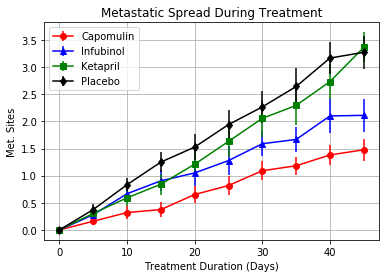

In [42]:
# Generate the Plot (with Error Bars) (John helped me understand a way with less code)
plt.errorbar(met_df.index,met_df['Capomulin'], yerr=met_SEM_df['Capomulin'], 
             color="red", marker ='o', label="Capomulin")
plt.errorbar(met_df.index,met_df['Infubinol'], yerr=met_SEM_df['Infubinol'], 
             color="blue", marker ='^', label="Infubinol")
plt.errorbar(met_df.index,met_df['Ketapril'], yerr=met_SEM_df['Ketapril'],
             color="green", marker ='s', label="Ketapril")
plt.errorbar(met_df.index,met_df['Placebo'], yerr=met_SEM_df['Placebo'],
             color="black", marker ='d', label="Placebo")
plt.legend()
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.grid()
# Save the Figure
plt.savefig("../Images/MetastaticConfig.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [43]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_df = merge_table.groupby(["Drug","Timepoint"])#["Mouse ID"].count()
mouse_df = mouse_df["Mouse ID"].count()

# Convert to DataFrame
mouse_df = pd.DataFrame(mouse_df)
mouse_df = mouse_df.reset_index()

# Preview DataFrame
mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [44]:
# Minor Data Munging to Re-Format the Data Frames
mouse_df = mouse_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')
# Preview the Data Frame
mouse_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


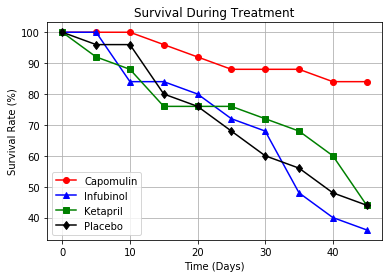

In [45]:
# Generate the Plot (Accounting for percentages)
plt.plot((100*mouse_df['Capomulin']/mouse_df['Capomulin'][0]), marker='o', color="red", label="Capomulin")
plt.plot((100*mouse_df['Infubinol']/mouse_df['Infubinol'][0]), marker='^', color="blue", label="Infubinol")
plt.plot((100*mouse_df['Ketapril']/mouse_df['Ketapril'][0]), marker='s', color="green", label="Ketapril")
plt.plot((100*mouse_df['Placebo']/mouse_df['Placebo'][0]), marker='d', color="black", label="Placebo")
plt.legend()
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.grid()

# Save the Figure
plt.savefig("../Images/SurvivalConfig.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [46]:
# Calculate the percent changes for each drug
perc_cap = (100*(tumor_df["Capomulin"].iloc[-1] - tumor_df["Capomulin"].iloc[0])/tumor_df["Capomulin"].iloc[-1])
perc_inf = (100*(tumor_df["Infubinol"].iloc[-1] - tumor_df["Infubinol"].iloc[0])/tumor_df["Infubinol"].iloc[-1])   
perc_ket = (100*(tumor_df["Ketapril"].iloc[-1] - tumor_df["Ketapril"].iloc[0])/tumor_df["Ketapril"].iloc[-1])
perc_pla = (100*(tumor_df["Placebo"].iloc[-1] - tumor_df["Placebo"].iloc[0])/tumor_df["Placebo"].iloc[-1])
# Display the data to confirm
percentages = [perc_cap, perc_inf, perc_ket, perc_pla]
drug = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
print(percentages)
print(drug)
x_axis = np.arange(len(percentages))
print(x_axis)

[-24.18550247705087, 31.56472480598781, 36.31741223029994, 33.905255774326214]
['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
[0 1 2 3]


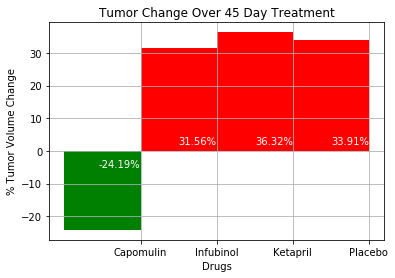

In [54]:
# Set color of each datapoint
color = []

for c in percentages:
    if c<0:
        color.append("g")
    else:
        color.append("r")
               
# Plot the barchart including the color determined from the for loop
plt.bar(x_axis, percentages, width=-1, align='edge',color=color)

#Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug)
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")

#Use functions to label the percentages of changes
count = 0
for x in percentages:
    if x<0:
        yvalue = -5
    else:
        yvalue = 2
    plt.text(count,yvalue,str(round(x,2))+'%',ha='right',color='white')
    count+=1

# Save the Figure
plt.savefig("../Images/TumorChangeConfig.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)